In [1]:
import pandas as pd
from igraph import Graph
import igraph
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import pandas as pd
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
import numpy as np
import pickle

In [2]:
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import GraphSAGELinkGenerator,GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from tensorflow import keras
import time

In [3]:
defaultVal = 1
incentiveVal = 1
penaltyVal = 1
# 극대화

In [4]:
# Edge between two user node (607,333 friendships)
file = '/home/jhpark/dataset_WWW2019/dataset_WWW2019/dataset_WWW_friendship_new.txt'
g = nx.read_edgelist(file , nodetype = int, edgetype='Freindship')
print(nx.info(g))

In [6]:
ig = Graph.from_networkx(g) # NetworkX to igraph 

In [7]:
ig.vs["id"] = ig.vs["_nx_name"]

In [8]:
ig.es["weight"] = [defaultVal]*ig.ecount()

In [9]:
node_features_encoded = pd.read_csv("/home/jhpark/dataset_WWW2019/node_features_encoded.csv", index_col=0)

In [10]:
node_features_encoded

,userID,latitude,longitude,degree,countrycode_encoded,category_encoded
0,15,36.292778,-119.332032,1,136,179
1,595326,36.330163,-119.292760,2,136,30
2,19,40.725292,-73.989419,21,136,3
3,54,37.781213,-122.402973,12,136,369
4,1061,37.761245,-122.402169,4,136,369
...,...,...,...,...,...,...
114319,2110586,41.015145,29.082438,1,130,311
114320,2112106,40.977817,28.869099,1,130,237
114321,2112150,1.349318,103.746295,1,122,199
114322,2127581,1.309555,103.778610,1,122,237


In [11]:
country_degree = pd.concat([node_features_encoded['countrycode_encoded'], node_features_encoded['degree']],axis=1)

In [12]:
node_embeddings = np.load('/home/jhpark/dataset_WWW2019/original_node_embedding.npy')

In [13]:
node_embeddings_df = pd.DataFrame(node_embeddings)

In [14]:
node_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.090709,-0.251975,-0.045467,0.282222,-0.149535,-0.188388,0.141450,0.009015,0.135344,-0.281213,...,-0.026789,-0.090211,0.054024,0.010953,0.087776,-0.030543,-0.103395,-0.307168,0.030882,0.042989
1,-0.105589,-0.249290,-0.082937,0.267890,-0.090993,-0.169736,0.191694,-0.022254,0.160962,-0.260920,...,-0.033256,-0.105994,0.068096,0.043847,0.052686,-0.101878,-0.125591,-0.271541,0.052875,0.041560
2,-0.117050,-0.251716,-0.063989,0.291099,-0.162530,-0.206871,0.159735,-0.001863,0.170982,-0.275303,...,-0.030248,-0.089254,0.046459,0.014740,0.081022,-0.034853,-0.101788,-0.271320,0.021608,0.035163
3,-0.106004,-0.258679,-0.063229,0.284126,-0.146060,-0.192055,0.153614,-0.000167,0.155111,-0.280773,...,-0.034719,-0.096458,0.061631,0.009796,0.066427,-0.066436,-0.114014,-0.280360,0.036167,0.061446
4,-0.105334,-0.252053,-0.073857,0.277144,-0.112141,-0.179464,0.175780,-0.013220,0.157722,-0.271809,...,-0.032830,-0.098836,0.067160,0.027920,0.053947,-0.094349,-0.117997,-0.274881,0.056160,0.059440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114319,-0.096574,-0.256842,-0.051753,0.287993,-0.145312,-0.190901,0.149999,0.005181,0.143315,-0.286338,...,-0.038752,-0.103813,0.053094,0.011279,0.086098,-0.046130,-0.118889,-0.294400,0.017810,0.047407
114320,-0.095367,-0.257921,-0.049849,0.289067,-0.148735,-0.192147,0.148332,0.006779,0.141814,-0.287648,...,-0.039021,-0.104452,0.052963,0.009199,0.087709,-0.042465,-0.119243,-0.294695,0.015460,0.048553
114321,-0.093358,-0.261078,-0.046274,0.292294,-0.156186,-0.195385,0.145562,0.009983,0.139395,-0.291332,...,-0.042762,-0.110915,0.053106,0.004353,0.092263,-0.036264,-0.122927,-0.292425,0.005524,0.051021
114322,-0.093358,-0.261078,-0.046274,0.292294,-0.156186,-0.195385,0.145562,0.009983,0.139395,-0.291332,...,-0.042762,-0.110915,0.053106,0.004353,0.092263,-0.036264,-0.122927,-0.292425,0.005524,0.051021


In [15]:
userGraph_baseline = StellarGraph.from_networkx(ig.to_networkx(), node_type_default = "user", edge_type_default = "friendship", node_features = node_embeddings_df)

In [16]:
def graphsage_learning(edge_splitter_test):
    # Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
    # reduced graph G_test with the sampled links removed:
    G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
        p=0.1, method="global", keep_connected=True
    )

    # Define an edge splitter on the reduced graph G_test:
    edge_splitter_train = EdgeSplitter(G_test)

    # Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
    # reduced graph G_train with the sampled links removed:
    G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
        p=0.1, method="global", keep_connected=True
    )

    batch_size = 20
    epochs = 5
    num_samples = [20, 10]

    train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples, weighted =True)
    train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)
    test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples, weighted =True)
    test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

    layer_sizes = [50, 50]
    graphsage = GraphSAGE(
        layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.3
    )

    x_inp, x_out = graphsage.in_out_tensors()

    prediction = link_classification(
        output_dim=1, output_act="relu", edge_embedding_method="ip"
    )(x_out)

    from tensorflow import keras
    model = keras.Model(inputs=x_inp, outputs=prediction)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.binary_crossentropy,
        metrics=["acc"],
    )

    init_train_metrics = model.evaluate(train_flow)
    init_test_metrics = model.evaluate(test_flow)

    print("\nTrain Set Metrics of the initial (untrained) model:")
    for name, val in zip(model.metrics_names, init_train_metrics):
        print("\t{}: {:0.4f}".format(name, val))

    print("\nTest Set Metrics of the initial (untrained) model:")
    for name, val in zip(model.metrics_names, init_test_metrics):
        print("\t{}: {:0.4f}".format(name, val))

    print()
    print("#################################################################################################################")

    history = model.fit(train_flow, epochs=epochs, validation_data=test_flow, verbose=2)

    import stellargraph as sg
    sg.utils.plot_history(history)

    print()
    print("################################################################################################################")

    train_metrics = model.evaluate(train_flow)
    test_metrics = model.evaluate(test_flow)

    print("\nTrain Set Metrics of the trained model:")
    for name, val in zip(model.metrics_names, train_metrics):
        print("\t{}: {:0.4f}".format(name, val))

    print("\nTest Set Metrics of the trained model:")
    for name, val in zip(model.metrics_names, test_metrics):
        print("\t{}: {:0.4f}".format(name, val))

** Sampled 60733 positive and 60733 negative edges. **
** Sampled 54660 positive and 54660 negative edges. **
link_classification: using 'ip' method to combine node embeddings into edge embeddings
6074/6074 [==============================] - 289s 48ms/step - loss: 2.1308 - acc: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 2.1340
	acc: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.1308
	acc: 0.5000

#################################################################################################################
Epoch 1/5
5466/5466 - 513s - loss: 0.4710 - acc: 0.7716 - val_loss: 0.5572 - val_acc: 0.7842
Epoch 2/5
5466/5466 - 510s - loss: 0.4342 - acc: 0.7964 - val_loss: 0.5690 - val_acc: 0.7631
Epoch 3/5
5466/5466 - 510s - loss: 0.4093 - acc: 0.8127 - val_loss: 0.4614 - val_acc: 0.8146
Epoch 4/5
5466/5466 - 511s - loss: 0.3933 - acc: 0.8188 - val_loss: 0.5334 - val_acc: 0.7729
Epoch 5/5
5466/5466 - 511s - loss: 0.3750 - acc: 0.8338 - val_loss: 

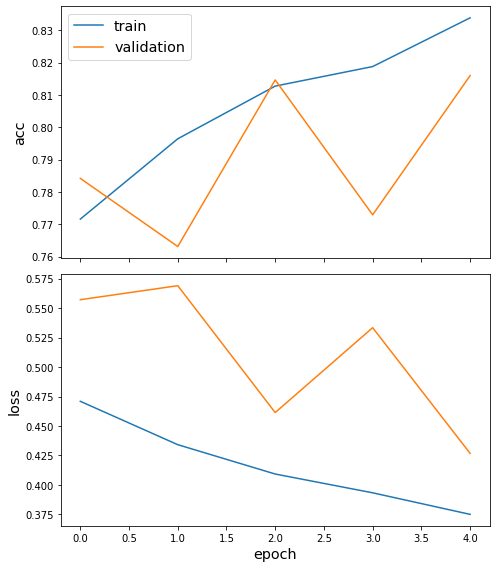

In [18]:
start = time.time()
edge_splitter_test = EdgeSplitter(userGraph_baseline)
graphsage_learning(edge_splitter_test)
print("time :", time.time() - start) 

### 이까지는 전체 그래프 (114,324개) Node embedding한 결과. 

In [19]:
with open("/home/jhpark/dataset_WWW2019/community_info.pickle","rb") as f:
    LP = pickle.load(f) # 1 Label-propagation-based

In [20]:
mu = Graph.community_multilevel(ig) # 2 Modularity-based => OK

In [21]:
mu.summary()

'Clustering with 114324 elements and 1964 clusters'

In [22]:
eigen = Graph.community_leading_eigenvector(ig) # 4 Eigenvector-based => OK

In [23]:
eigen.summary()

'Clustering with 114324 elements and 1864 clusters'

In [14]:
random_walk = Graph.community_walktrap(ig) # 5 Random walks-based => OK 

In [15]:
random_walk.summary()

'Dendrogram, 114324 elements, 112463 merges'

In [27]:
random_walk = random_walk.as_clustering()

In [36]:
random_walk.summary()

'Clustering with 114324 elements and 7931 clusters'

In [13]:
info = Graph.community_infomap(ig) # 7 InfoMAP algorithm => OK

In [14]:
info.summary()

'Clustering with 114324 elements and 8182 clusters'

In [24]:
# 알고리즘 선택 @@@
cd_result = mu

In [ ]:
size_threshold = 100

In [1]:
batch_size = 20
epochs = 5
num_samples = [20, 10]
layer_sizes = [50, 50]

def subGraphSAGE(subgraphList):
    subgraph = ig.induced_subgraph(subgraphList,implementation="create_from_scratch")
    isin_filter = node_features_encoded['userID'].isin(subgraph.vs['id'])
    
    subgraph_features = node_features_encoded[isin_filter]
    subgraph_country_degree = pd.concat([subgraph_features['countrycode_encoded'], subgraph_features['degree']],axis=1)
    subgraph_country_degree.reset_index(drop=True,inplace=True)
    
    subgraph_ = StellarGraph.from_networkx(subgraph.to_networkx(), node_type_default = "user", edge_type_default = "friendship", node_features = subgraph_country_degree)
   
    subnodes = list(subgraph_.nodes())
    sub_unsupervised_samples = UnsupervisedSampler(
        subgraph_, nodes = subnodes, length=5, number_of_walks=1
    )
    
    sub_generator = GraphSAGELinkGenerator(subgraph_, batch_size, num_samples)
    sub_train_gen = sub_generator.flow(sub_unsupervised_samples)
    
    sub_graphsage = GraphSAGE(
        layer_sizes = layer_sizes, generator=sub_generator, bias=True, dropout=0.0, normalize="l2"
    )
    
    x_inp, x_out = sub_graphsage.in_out_tensors()
    x_inp_src = x_inp[0::2]
    x_out_src = x_out[0]
    sub_embedding_model = keras.Model(inputs = x_inp_src, outputs = x_out_src)
    
    sub_node_ids = subgraph_.nodes()
    sub_node_gen = GraphSAGENodeGenerator(subgraph_, batch_size, num_samples).flow(sub_node_ids)
    
    sub_node_embeddings = sub_embedding_model.predict(sub_node_gen, workers=4, verbose=1)
    
    return sub_node_embeddings

In [26]:
start = time.time()
count = 0 
for community_no in range(len(cd_result)):
     
    # Intra Community Embedding 
    if len(cd_result[community_no]) > size_threshold:
        sub_node_embeddings = subGraphSAGE(cd_result[community_no])
        print(len(sub_node_embeddings))
        
        # 전체 그래프에 대한 GraphSAGE에 의해 도출된 feature를 아예 덮어쓰는 것. 
        j=0
        for i in cd_result[community_no]:
            node_embeddings[i] = sub_node_embeddings[j]
            j += 1
            count += 1 # 총 덮어쓴 횟수 (=100보다 큰 커뮤니티에 포함된 노드의 개수)
print("time :", time.time() - start) 

861/861 [==============================] - 29s 33ms/step
17207
137/137 [==============================] - 5s 32ms/step
2727
527/527 [==============================] - 18s 33ms/step
10534
46/46 [==============================] - 2s 33ms/step
901
146/146 [==============================] - 5s 31ms/step
2917
108/108 [==============================] - 4s 33ms/step
2153
23/23 [==============================] - 1s 33ms/step
452
38/38 [==============================] - 1s 26ms/step
745
365/365 [==============================] - 13s 35ms/step
7290
281/281 [==============================] - 10s 36ms/step
5613
609/609 [==============================] - 20s 33ms/step
12172
15/15 [==============================] - 1s 26ms/step
288
52/52 [==============================] - 2s 30ms/step
1027
52/52 [==============================] - 2s 32ms/step
1039
7/7 [==============================] - 0s 27ms/step
122
435/435 [==============================] - 15s 35ms/step
8686
362/362 [===========================

In [19]:
c = 0
for s in range(len(cd_result)):
    if len(cd_result[s])>100:
        c += len(cd_result[s])

In [20]:
if (c == count): print("Embedding Overwriting Complete!")

Embedding Overwriting Complete!


### Downstream Task

In [27]:
node_embeddings_df = pd.DataFrame(node_embeddings)

In [28]:
userGraph_partitioned = StellarGraph.from_networkx(ig.to_networkx(), node_type_default = "user", edge_type_default = "friendship", node_features = node_embeddings_df)

** Sampled 60733 positive and 60733 negative edges. **
** Sampled 54660 positive and 54660 negative edges. **
link_classification: using 'ip' method to combine node embeddings into edge embeddings
6074/6074 [==============================] - 289s 48ms/step - loss: 0.3545 - acc: 0.9074

Train Set Metrics of the initial (untrained) model:
	loss: 0.3477
	acc: 0.9099

Test Set Metrics of the initial (untrained) model:
	loss: 0.3545
	acc: 0.9074

#################################################################################################################
Epoch 1/5
5466/5466 - 510s - loss: 0.1928 - acc: 0.9473 - val_loss: 0.2215 - val_acc: 0.9501
Epoch 2/5
5466/5466 - 759s - loss: 0.1636 - acc: 0.9508 - val_loss: 0.1982 - val_acc: 0.9521
Epoch 3/5
5466/5466 - 515s - loss: 0.1626 - acc: 0.9510 - val_loss: 0.1951 - val_acc: 0.9540
Epoch 4/5
5466/5466 - 514s - loss: 0.1525 - acc: 0.9549 - val_loss: 0.1883 - val_acc: 0.9535
Epoch 5/5
5466/5466 - 517s - loss: 0.1484 - acc: 0.9554 - val_loss: 

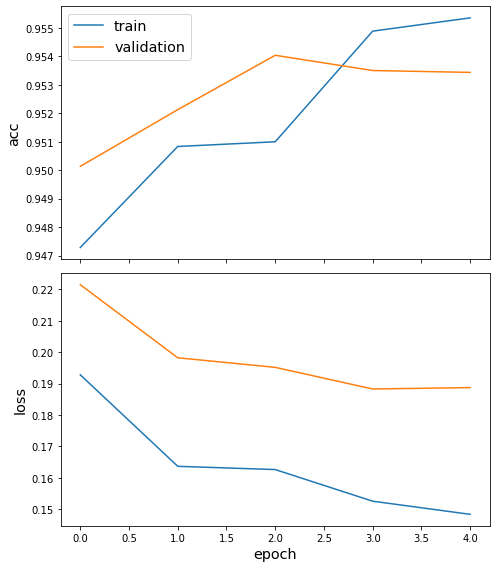

In [29]:
start = time.time()
edge_splitter_test = EdgeSplitter(userGraph_partitioned)
graphsage_learning(edge_splitter_test)
print("time :", time.time() - start) 

In [ ]:
'''
Train Set Metrics of the trained model:
	loss: 0.4121
	acc: 0.8249

Test Set Metrics of the trained model:
	loss: 0.4171
	acc: 0.8248
----------------------------------
Train Set Metrics of the trained model:
	loss: 0.2021
	acc: 0.9426

Test Set Metrics of the trained model:
	loss: 0.2076
	acc: 0.9417
'''